<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/Intro_Quant_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vega


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.4 MB/s eta 0:00:00


In [4]:
import numpy
import pytest
import scipy
import statsmodels
import altair
import vega
import vega_datasets
import sklearn
import tensorflow
import matplotlib

In [5]:
import random

possible_states = [1, 2, 3, 4, 5, 6]

random.choice(possible_states)

4

In [6]:

NUM_TRIALS = 100000

results = [random.choice(possible_states) for i in range(NUM_TRIALS)]


In [7]:
from collections import Counter
counts = Counter(results)
counts


Counter({2: 16597, 3: 16779, 5: 16495, 1: 16618, 6: 16702, 4: 16809})

In [8]:
import altair as alt
import vega
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [9]:
import pandas as pd
die=pd.DataFrame({
    'state':possible_states,
    'count':[counts.get(state,0)for state in possible_states]
})

In [10]:
print(die)

   state  count
0      1  16618
1      2  16597
2      3  16779
3      4  16809
4      5  16495
5      6  16702


In [13]:
import pandas as pd

die_rolls = pd.DataFrame({
    'state': possible_states,
    'count': [counts.get(state, 0) for state in possible_states]
})

print(die_rolls)

alt.Chart(die_rolls).mark_bar().encode(
    x='state:O',
    y='count'
)

   state  count
0      1  16618
1      2  16597
2      3  16779
3      4  16809
4      5  16495
5      6  16702


alt.Chart(...)

In [14]:
%%html
<!-- Run me, but there is  need to worry about this code -
    it makes the equation in the next cell larger and more readable -->
<style>
    .big_function {font-size: 200%;}
</style>

In [15]:
# Let's plot that out
import numpy as np
x = np.linspace(-5, 5, 1000)  # 1000 linearly spaced points starting -5 going to 5

mean = 0
sigma = 1

y = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.e ** -((x - mean) ** 2) / (2 * sigma ** 2)

# Or a bit more nicely laid out...

scale_term = (1 / np.sqrt(2 * np.pi * sigma ** 2))
exponent_term = ((x - mean) ** 2) / (2 * sigma ** 2)
y = scale_term * np.e ** -exponent_term

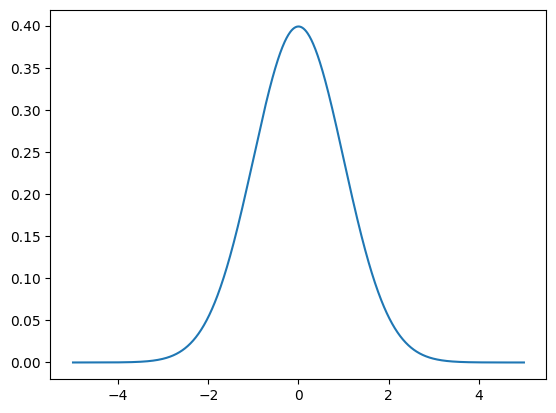

In [16]:
from matplotlib import pyplot as plt
plt.plot(x, y, "-");